In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/CV Project/source_code'

/content/drive/My Drive/CV Project/source_code


In [ ]:
!ls

 config				      __pycache__
 data				      SSD
 dataset			     'SSD detect.ipynb'
'detect Faster RCNN notebook.ipynb'   svm
 Evaluation.ipynb		     'Train Faster RCNN notebook.ipynb'
 faster_rcnn			     'Train SSD.ipynb'
 loss.txt			      utils.py
 model				      widerface_evaluate


In [ ]:
! mkdir '/content/data'

In [ ]:
! unrar x '/content/drive/My Drive/CV Project/source_code/dataset/wider_face.rar'  '/content/data/'

Streaming output truncated to the last 5000 lines.
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_480.jpg      83%  OK 
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_49.jpg      83%  OK 
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_491.jpg      83%  OK 
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_494.jpg      83%  OK 
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_498.jpg      83%  OK 
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_501.jpg      83%  OK 
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_T

In [ ]:
from faster_rcnn.model import get_object_detection_model
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
faster_rcnn_model = get_object_detection_model(num_classes = 2, from_pretrained =  True)
faster_rcnn_model.to(device)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
with open("./config/fasterrcnn.yaml", "r") as f:
    config = yaml.safe_load(f)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


checkpoint = config['checkpoint']
print(checkpoint)
checkpoint = torch.load(checkpoint)

model =  get_object_detection_model(num_classes = 2)
model.load_state_dict(checkpoint['model'])
model = model.to(device)
print(config)


./model/checkpoint_fasterrcnn.pth.tar


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


{'checkpoint': './model/checkpoint_fasterrcnn.pth.tar', 'batch_size': 16, 'iterations': 60000, 'workers': 2, 'print_freq': 200, 'lr': 0.005, 'momentum': 0.9, 'decay_lr_to': 0.1, 'weight_decay': '5e-4', 'n_classes': 2}


In [ ]:
from faster_rcnn.detect import faster_rcnn_detect

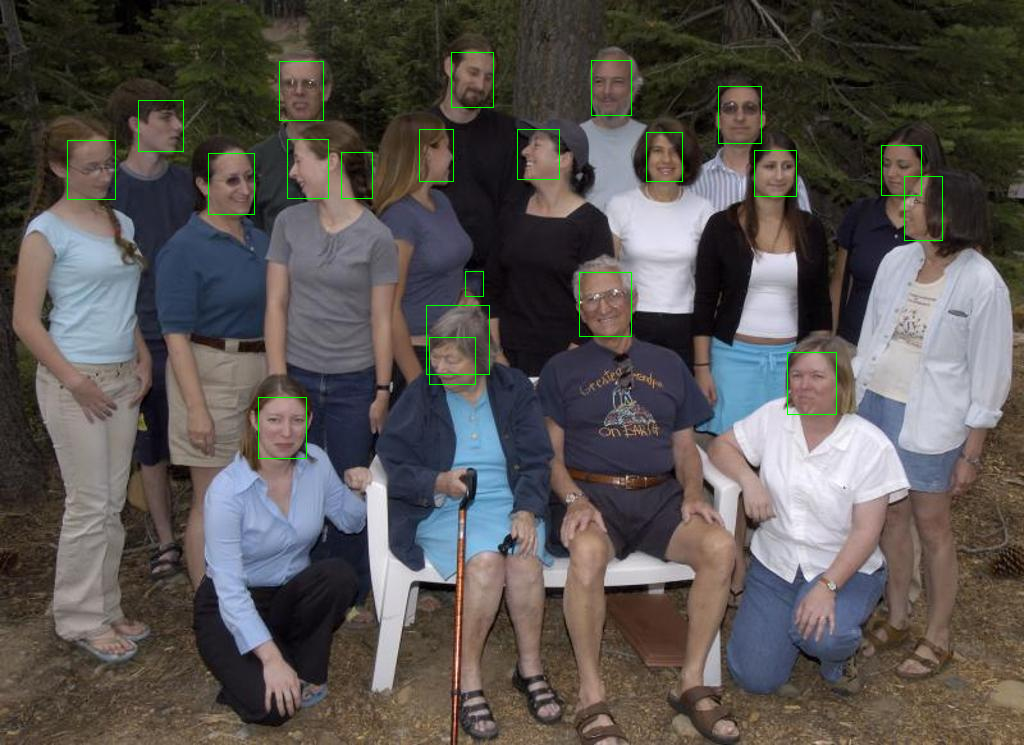

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img_path = '/content/data/wider_face/train/images/6--Funeral/6_Funeral_Funeral_6_383.jpg'
# img_path = '/content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_6.jpg'
# img_path = '/content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_573.jpg'
# img_path = '/content/data/wider_face/train/images/52--Photographers/52_Photographers_photographertakingphoto_52_339.jpg'
# img_path = '/content/data/wider_face/train/images/47--Matador_Bullfighter/47_Matador_Bullfighter_matadorbullfighting_47_770.jpg'
# img_path = '/content/data/wider_face/train/images/47--Matador_Bullfighter/47_Matador_Bullfighter_matadorbullfighting_47_644.jpg'
# img_path = '/content/data/wider_face/train/images/12--Group/12_Group_Group_12_Group_Group_12_51.jpg'
img_path = '/content/data/wider_face/train/images/12--Group/12_Group_Large_Group_12_Group_Large_Group_12_731.jpg'
# img_path = '/content/data/wider_face/val/images/13--Interview/13_Interview_Interview_Sequences_13_33.jpg'

im = faster_rcnn_detect(model, img_path, device, threshold = 0.02, visualize = True)
cv2_imshow(im)


In [ ]:
# load the best model and trained weights
with open("./config/fasterrcnn.yaml", "r") as f:
    config = yaml.safe_load(f)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


checkpoint = config['checkpoint']
print(checkpoint)
checkpoint = torch.load(checkpoint)

model =  get_object_detection_model(num_classes = 2)
model.load_state_dict(checkpoint['model'])
model = model.to(device)
print(config)

./model/checkpoint_fasterrcnn.pth.tar


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


{'checkpoint': './model/checkpoint_fasterrcnn.pth.tar', 'batch_size': 16, 'iterations': 60000, 'workers': 2, 'print_freq': 200, 'lr': 0.005, 'momentum': 0.9, 'decay_lr_to': 0.1, 'weight_decay': '5e-4', 'n_classes': 2}


In [ ]:
with open('/content/data/wider_face/val/wider_val.txt', 'r') as f:
  val_images = f.read().splitlines()

print(val_images[0:5])

['/24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_329.jpg', '/24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_10.jpg', '/24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_1037.jpg', '/24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_115.jpg', '/24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_129.jpg']


In [ ]:
# pred_dir = './widerface_evaluate/detection_results/faster_rcnn_no_augment'
pred_dir = './widerface_evaluate/predictions/faster_rcnn'

for img_name in tqdm(val_images):
  img_path = '/content/data/wider_face/val/images' + img_name
  # print(img_path)
  # detections, probabilities = detect(original_image, min_score=0.2, max_overlap=0.5, top_k=200, visualize = False)
  detections, probabilities = faster_rcnn_detect(model, img_path, device, threshold = 0.02)
  num_faces = len(detections)

  pred_file = pred_dir + img_name[:-4] + ".txt"
  class_dir = "/".join(pred_file.split("/")[:-1] )

  if not os.path.isdir(class_dir):
    os.mkdir(class_dir)
  # print(pred_file[:-4])
  with open(pred_file, 'w') as f:
    file_name = pred_file.replace("/widerface_evaluate", "")[:-4]
    f.write( file_name+ '\n')
    f.write(str(num_faces) + '\n')

    for i  in range(num_faces):
      box = detections[i]
      confidence = probabilities[i]
      x_min, y_min = box[0], box[1]
      w = int(box[2]) - int(box[0])
      h = int(box[3]) - int(box[1])
      line = str(x_min) + " " + str(y_min) + " " + str(w) + " " + str(h) + " " + str(confidence) + " \n"
      f.write(line)
      # print(line + \n)

      


  0%|          | 0/3226 [00:00<?, ?it/s]

In [ ]:
# load the best model and trained weights
with open("./config/fasterrcnn_no_augment.yaml", "r") as f:
    config = yaml.safe_load(f)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


checkpoint = config['checkpoint']
print(checkpoint)
checkpoint = torch.load(checkpoint)

model =  get_object_detection_model(num_classes = 2)
model.load_state_dict(checkpoint['model'])
model = model.to(device)
print(config)

./model/checkpoint_fasterrcnn_no_pretrained.pth.tar


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


{'checkpoint': './model/checkpoint_fasterrcnn_no_pretrained.pth.tar', 'batch_size': 16, 'iterations': 60000, 'workers': 2, 'print_freq': 200, 'lr': 0.001, 'momentum': 0.9, 'decay_lr_to': 0.1, 'weight_decay': '5e-4', 'n_classes': 2}


In [ ]:
pred_dir = './widerface_evaluate/predictions/faster_rcnn_no_pretrained'

for img_name in tqdm(val_images):
  img_path = '/content/data/wider_face/val/images' + img_name
  # print(img_path)
  # detections, probabilities = detect(original_image, min_score=0.2, max_overlap=0.5, top_k=200, visualize = False)
  detections, probabilities = faster_rcnn_detect(model, img_path, device, threshold = 0.02)
  num_faces = len(detections)

  pred_file = pred_dir + img_name[:-4] + ".txt"
  class_dir = "/".join(pred_file.split("/")[:-1] )

  if not os.path.isdir(class_dir):
    os.mkdir(class_dir)
  # print(pred_file[:-4])
  with open(pred_file, 'w') as f:
    file_name = pred_file.replace("/widerface_evaluate", "")[:-4]
    f.write( file_name+ '\n')
    f.write(str(num_faces) + '\n')

    for i  in range(num_faces):
      box = detections[i]
      confidence = probabilities[i]
      x_min, y_min = box[0], box[1]
      w = int(box[2]) - int(box[0])
      h = int(box[3]) - int(box[1])
      line = str(x_min) + " " + str(y_min) + " " + str(w) + " " + str(h) + " " + str(confidence) + " \n"
      f.write(line)
      # print(line + \n)

      


  0%|          | 0/3226 [00:00<?, ?it/s]